In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import *
import time

In [14]:
graph_file = '../hw3dataset/graph_5.txt'
graph_result = '../results/graph_5/graph_5_SimRank.txt'
f = open(graph_file,'r')
input = []
for line in f.readlines():
    s = line.split('\n')[0]
    s = s.split(',')
    s = tuple(s)
    input.append(s)
f.close

<function TextIOWrapper.close()>

In [15]:
G = nx.DiGraph()
G.add_edges_from(input)
print("節點個數: ",G.number_of_nodes())
print("邊的個數: ",G.number_of_edges())

節點個數:  469
邊的個數:  1102


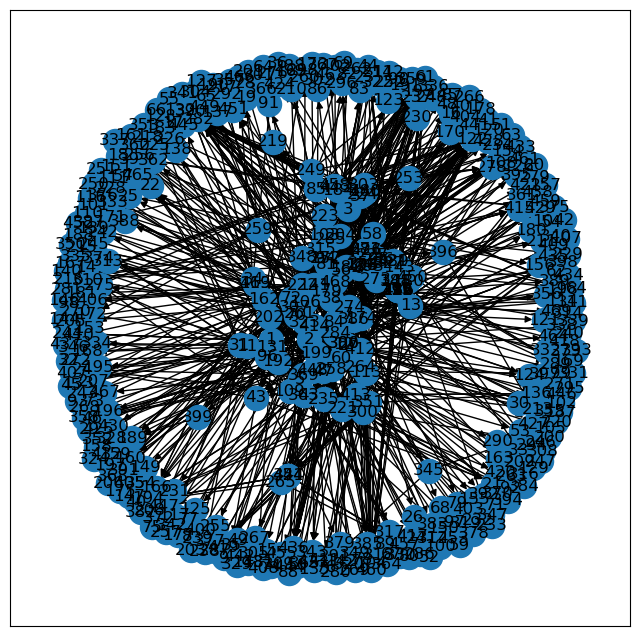

In [16]:
plt.figure(figsize =(8, 8))
nx.draw_networkx(G, with_labels = True)
plt.show()

In [17]:
def simrank(graph, c, iter):
    nodenum = graph.number_of_nodes()
    srank = [[0]*nodenum for i in range(nodenum)]
    for i in range(nodenum): # 首先先建立第一張表
        for j in range(nodenum):
            row = i + 1
            col = j + 1
            row = str(row)
            col = str(col)
            if i == j: # 矩陣的對角線都設1
                srank[i][i] = 1
            else:
                Sum = 0
                row_parent_num = graph.in_degree(row) # 計算 node1 的父親數量
                col_parent_num = graph.in_degree(col) # 計算 node2 的父親數量
                for r_predecessors in graph.predecessors(row): # 針對所有 node1 的父親迴圈(排列組合)
                    for c_predecessors in graph.predecessors(col): # 針對所有 node2 的父親迴圈(排列組合)
                        if r_predecessors == c_predecessors: # 若 node1 = node2，總和+1
                            Sum += 1    
                if row_parent_num == 0 or col_parent_num == 0: # 若 node1 或 node2 沒有父親，設0
                    srank[i][j] = 0
                else: # 依據公式
                    srank[i][j] = c * (1.0/(row_parent_num*col_parent_num)) * Sum
    for k in range(iter-1): # 進行迭代
        lastsrank = srank # 將上個迭代的表存起來
        for i in range(nodenum):
            for j in range(nodenum):
                row = i + 1
                col = j + 1
                row = str(row)
                col = str(col)
                row_parent_num = graph.in_degree(row) # 計算 node1 的父親數量
                col_parent_num = graph.in_degree(col) # 計算 node2 的父親數量
                if i == j:
                    continue
                else:
                    Sum = 0
                    for r_predecessors in graph.predecessors(row): # 針對所有 node1 的父親迴圈(排列組合)
                        for c_predecessors in graph.predecessors(col): # 針對所有 node2 的父親迴圈(排列組合)
                            Sum += lastsrank[int(r_predecessors)-1][int(c_predecessors)-1] # 查詢上個迭代的表，並進行加總
                    if row_parent_num == 0 or col_parent_num == 0: # 若 node1 或 node2 沒有父親，設0
                        srank[i][j] = 0
                    else: # 依據公式
                        srank[i][j] = c * (1.0/(row_parent_num*col_parent_num)) * Sum
    return srank

In [18]:
decay_factor = 0.7
iter=30
start = time.time()
ans = simrank(G, decay_factor, iter)
end = time.time()
print('PageRank 運算時間:',(end-start))
result = pd.DataFrame(data=ans)
result

PageRank 運算時間: 15.66707968711853


,0,1,2,3,4,5,6,7,8,9,...,459,460,461,462,463,464,465,466,467,468
0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.700000,0.0,0.0,1.000000,0.134342,0.171500,0.0,0.0
465,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.134342,0.0,0.0,0.134342,1.000000,0.114333,0.0,0.0
466,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.171500,0.0,0.0,0.171500,0.114333,1.000000,0.0,0.0
467,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.077721,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0


In [19]:
matrix = mat(ans)
np.savetxt(graph_result ,matrix, fmt='%.3f')